In [ ]:
import numpy as np
my_list = list(range(100000))
my_array = np.array(100000)
print(my_list)
print(my_array)

In [17]:
%time for _ in range(10): [i*2 for i in my_list]

CPU times: total: 46.9 ms
Wall time: 51.8 ms


In [18]:
%time for _ in range(10): my_array * 2

CPU times: total: 0 ns
Wall time: 216 µs


In [8]:
data = [1,23,343,4,34]
tup = (12,12,12,234)
array = np.array(data)
tuple1 = np.array(tup)

In [10]:
print(data)
print(array)
print(tuple1)
array.ndim # arrayning o'lchamini chiqaradi

[1, 23, 343, 4, 34]
[  1  23 343   4  34]
[ 12  12  12 234]


1

In [14]:
matrix = [[1,2,3],[4,5,6],[7,8,9]]
num_matrix = np.array(matrix)
num_matrix
num_matrix.ndim # massiv ning o'lchami
num_matrix.shape # qator va ustunlar soni
num_matrix.size # massivdagi jami elementlar soni

9

In [19]:
array1 = np.ones(shape=(4,5))
array1
array2 = np.zeros(shape=(3,4))
array2

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [20]:
array3 = np.arange(2,30,3)
array3

array([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29])

In [26]:
arr = np.array([1,2,3,4],dtype=np.float64)
arr1 = np.array([1,2,3,4],dtype=np.int16)
arr1
arr1.dtype

dtype('int16')

In [28]:
nums = np.array([1,2,3,4],dtype=np.float32)
float_num = nums.astype(np.int16)
float_num

array([1, 2, 3, 4], dtype=int16)

In [29]:
arr = np.array([10, 15, 20, 25, 30, 35, 40])

print(arr[1:4])

[15 20 25]


In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


In [2]:
df['district'].value_counts()

district
Чиланзарский         1616
Мирзо-Улугбекский    1342
Учтепинский           872
Юнусабадский          847
Мирабадский           717
Яккасарайский         628
Яшнободский           456
Шайхантахурский       356
Олмазорский           262
Сергелийский          159
Янгихаётский           15
Бектемирский            8
Name: count, dtype: int64

In [3]:
housing = df[df.district=='Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [4]:
X = housing['size'].to_numpy()
X

array([42., 65., 70., ..., 32., 70., 30.])

In [5]:
y = housing['price'].to_numpy()
y

array([37000., 49500., 55000., ..., 28000., 49800., 22914.])

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

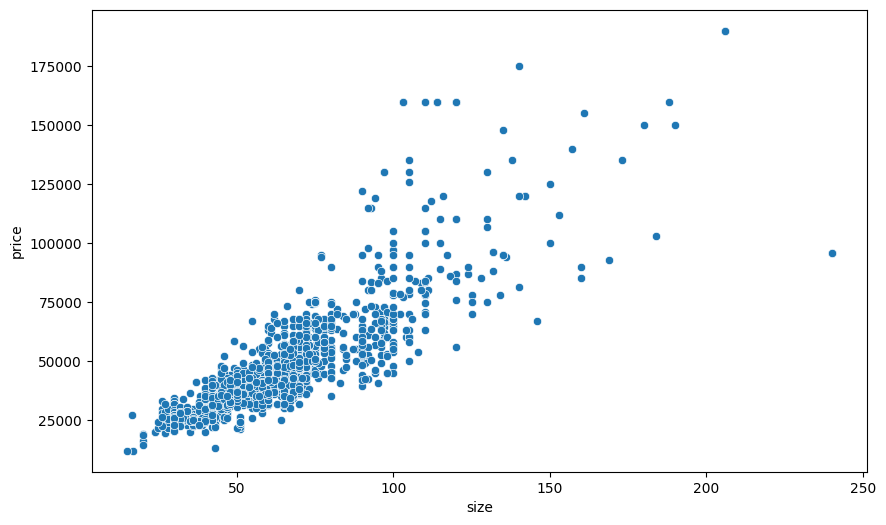

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

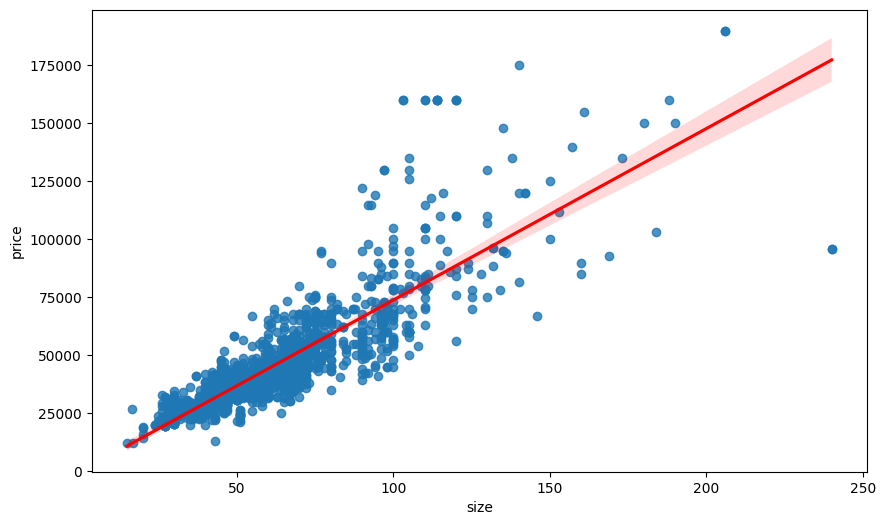

In [8]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

In [9]:
import numpy as np

Xmean = np.mean(X)
ymean = np.mean(y)

In [10]:
theta1 = sum((X-Xmean)*(y-ymean))/sum((X-Xmean)**2)
print(f"{theta1=}")

theta1=740.0264822713287


In [11]:
theta0 = ymean - theta1*Xmean
print(f"{theta0=}")

theta0=-195.94911352690542


In [12]:
x_test = housing.sample(10, random_state=42)['size'].to_numpy()
print(f"{x_test=}")
y_test = housing.sample(10, random_state=42)['price'].to_numpy()
print(f"{y_test=}")

x_test=array([54., 42., 36., 60., 48., 68., 38., 65., 52., 44.])
y_test=array([37500., 26500., 25500., 39000., 32500., 34500., 22700., 47000.,
       37900., 36000.])


In [13]:
y_predict = theta0 + theta1*x_test
print(f"{y_predict=}")

y_predict=array([39765.48092912, 30885.16314187, 26445.00424824, 44205.63982275,
       35325.3220355 , 50125.85168092, 27925.05721278, 47905.77223411,
       38285.42796458, 32365.21610641])


In [14]:
# MAE
MAE = np.sum(np.absolute(y_predict-y_test))/len(y_test)
print(f"{MAE=}")

MAE=4140.35031634715


In [15]:
# RMSE
RMSE = np.sqrt(np.sum((y_predict-y_test)**2)/len(y_test))
print(f"{RMSE=}")

RMSE=5882.051673173715


In [16]:
housing.shape

(1616, 6)

In [17]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.10, random_state=42)

In [18]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

# Modelni tarbiyalaymiz (train)
LR_model.fit(x_train, y_train)

#theta1 va theta0 koeefisentlarni ajratib olamiz 
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print (f'{theta1=}')
print (f'{theta0=}')

theta1=732.7784051414766
theta0=106.31843170110369


Text(0, 0.5, 'Price')

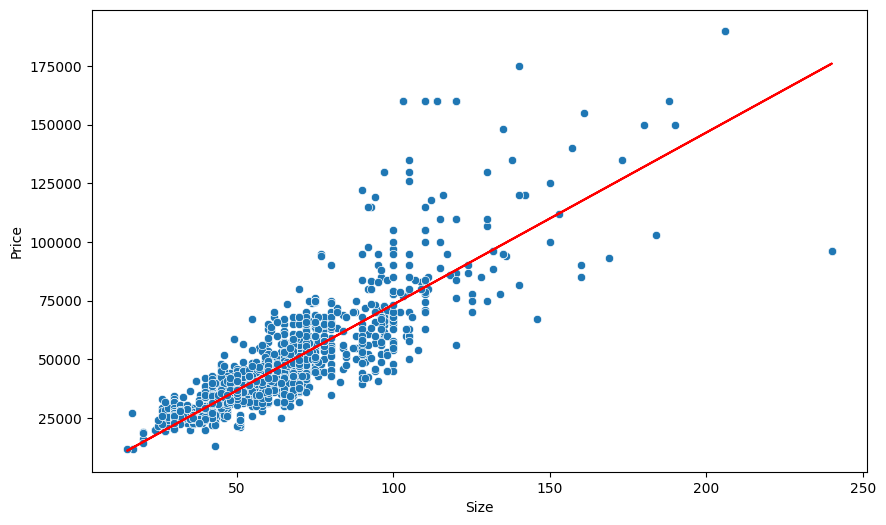

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("Size")
plt.ylabel("Price")

In [20]:
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])

In [21]:
y_predict = LR_model.predict(x_test)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")

MAE=7269.709648262382
RMSE=12734.803748258666
